In [3]:
import matplotlib
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn as sk
import sys
import matplotlib.pyplot as plt
from sklearn import svm


from sklearn.datasets import load_iris, make_moons
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, accuracy_score
from sklearn.pipeline import make_pipeline, Pipeline
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import Ridge, Lasso, ElasticNet, SGDClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.base import clone

from sklearn.svm import SVR
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz


#   TIPS PRÁCTICOS PARA UTILIZAR DECISION TREE Y GRID SEARCH
* Arboles de decisión tienden a sobreajustar el modelo con muchas variables independientes (features)
* Importante utilizar PCA, ICA o selección de principales características o variables independientes
* Utiliza max_depth = 3 Que sería lo optimo. 2 y 3 otorgan buenos resultados
* Con max_depth se controla el sobreajuste del modelo
* Utiliza min_samples_splits o min_samples_leaf para controlar el número de muestras en los nodos de las hojas
* Balancea tus datos antes del entrenamiento para evitar que el modelo se sesge con las clases dominantes
* Esto se logra con:
** 1) Número igual de muestras para cada característica
** 2) Normalizando la suma ponderada de la muestra


[[0, 0], [3, 3]]
[0.75, 3]


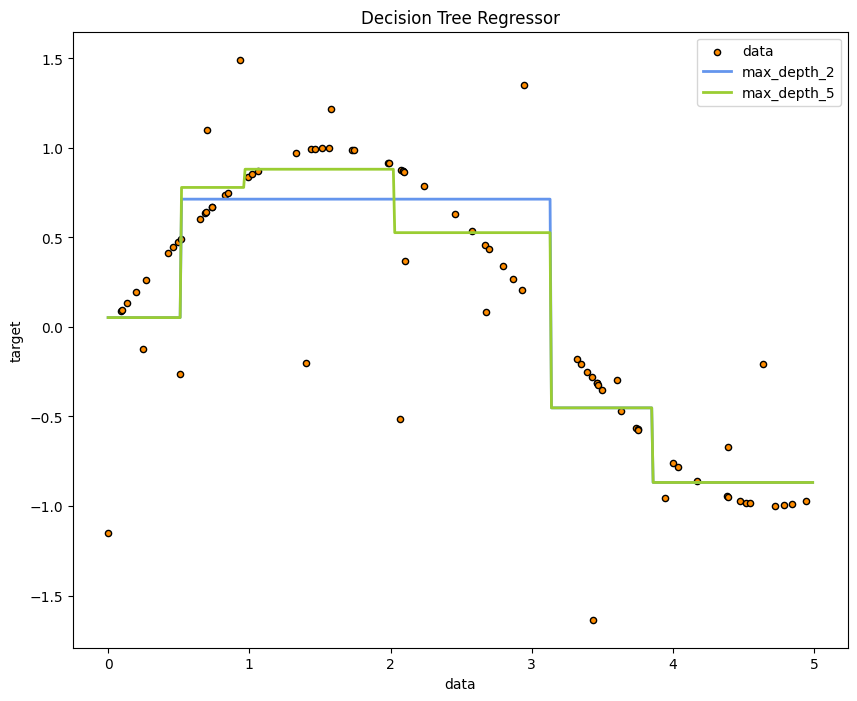

In [4]:
X = [[0, 0], [3, 3]]
y = [0.75, 3]

print(X)
print(y)

tree_reg = tree.DecisionTreeRegressor(random_state=42)

tree_reg.fit(X, y)
tree_reg.predict([[1.5, 1.5]])

#Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()                       # ravel change an n dimensional array into a contiguous flattened array

y[::5] += 3 * (0.5 - rng.rand(16))      # Buscar que significa

# Ajustar el modelo de regresión
regr_1 = DecisionTreeRegressor(max_depth=2)     # máxima profundidad recomendada es dos. Para que detecte bien el patrón de los datos. Entre más alta la profundidad toma en cuenta más datos
regr_2 = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10)     # max_depth = 5 no se recomienda porque estaría recogiendo los outliers como patrón en los datos y se estaría sesgando la estimación
regr_1.fit(X, y)
regr_2.fit(X, y)

#Predicción
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)



#Grafica los resultados
plt.figure(figsize=(10,8))
plt.scatter(X, y, s=20, edgecolors="black", c="darkorange", label="data" )
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth_2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth_5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regressor")
plt.legend()
plt.show()

In [7]:
# Overfitting (Sobreajuste)
iris = load_iris()
X = iris.data[:, 0:2]
y = iris.target
clf = tree.DecisionTreeRegressor(random_state=42)

#dot_data = tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names[2:], class_names=iris.target_names, rounded=True, filled=True)
#graph = graphviz.Source(dot_data)


# Modeling end to end with Decision Tree

X_data, y_data = make_moons(n_samples=1000, noise=0.5, random_state=42)        # Datos que forman una luna
cl1 = tree.DecisionTreeClassifier(random_state=42)
cl2 = tree.DecisionTreeClassifier(random_state=42, min_samples_leaf=10)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, random_state=42)

params = {
    'min_samples_leaf': list(range(5, 20))
}

grid_search_cv = GridSearchCV(tree.DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1)
grid_search_cv.fit(X_train, y_train)
#print(grid_search_cv.fit(X_train, y_train))

GridBestEstimator = grid_search_cv.best_estimator_  #Indica los mejores parámetros para ajustar al modelo
print('Mejor estimador Grid:' ,GridBestEstimator)

y_pred = grid_search_cv.predict(X_test)
print(y_pred)

AccuracyTest = accuracy_score(y_test, y_pred)
print('Accuracy Score con grid search:', AccuracyTest)                             # Grid Searching es más exacto. Se obtiene mejor rendimiento con Grid Search

cl1.fit(X_train, y_train)
y_pred = cl1.predict(X_test)

AccuracyTest = accuracy_score(y_test, y_pred)
print('Accuracy Score con Decision Tree tradicional:', AccuracyTest)

print(cl1.get_params())




Fitting 5 folds for each of 15 candidates, totalling 75 fits
Mejor estimador Grid: DecisionTreeClassifier(min_samples_leaf=16, random_state=42)
[1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0
 0 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1]
Accuracy Score con grid search: 0.83
Accuracy Score con Decision Tree tradicional: 0.74
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
